In [20]:
import pandas as pd
import numpy as np

# Set a seed for reproducibility
np.random.seed(100)

# Generate synthetic data for 100 rows
data = {
    "Age": np.random.randint(20, 80, size=100),
    "Blood Pressure": np.random.randint(90, 180, size=100),
    "Cholesterol Level": np.random.randint(150, 300, size=100),
    "BMI": np.round(np.random.uniform(18.5, 35.0, size=100), 1),
    "Previous Hospital Visits": np.random.randint(0, 10, size=100)
}

# Create DataFrame
health_df = pd.DataFrame(data)

# Show the first few rows
print(health_df.head())

# Save to CSV
health_df.to_csv("health_data.csv", index=False)


First 5 rows of normalized training data:
[[0.98305085 0.12359551 0.40939597 0.89849387 0.33333333]
 [0.30508475 0.42696629 0.42281879 0.16072956 0.77777778]
 [0.25423729 0.68539326 0.23489933 0.97037447 0.88888889]
 [0.49152542 0.29213483 0.56375839 0.13409805 0.88888889]
 [0.6779661  0.02247191 0.56375839 0.79733294 0.22222222]]

First 5 rows of normalized testing data:
[[0.69491525 0.41573034 0.95973154 0.76009714 0.88888889]
 [0.89830508 0.79775281 1.         0.14680495 0.66666667]
 [0.66101695 0.83146067 0.76510067 0.87373202 0.88888889]
 [0.50847458 0.37078652 1.         0.32480801 0.        ]
 [0.05084746 0.52808989 0.11409396 0.51958392 1.        ]]


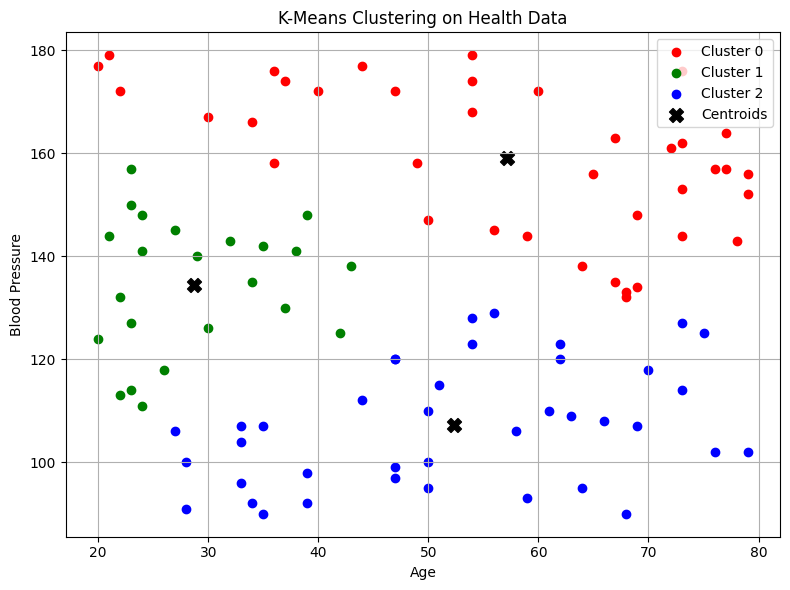

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("health_data.csv")
X = df[["Age", "Blood Pressure"]].values
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))
def initialize_centroids(X, k):
    indices = np.random.choice(len(X), k, replace=False)
    return X[indices]
def assign_clusters(X, centroids):
    clusters = []
    for x in X:
        distances = [euclidean_distance(x, centroid) for centroid in centroids]
        clusters.append(np.argmin(distances))
    return clusters
def update_centroids(X, clusters, k):
    new_centroids = []
    for i in range(k):
        points = X[np.array(clusters) == i]
        new_centroids.append(np.mean(points, axis=0))
    return np.array(new_centroids)
def k_means(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)
        if np.allclose(centroids, new_centroids): 
            break
        centroids = new_centroids
    return centroids, clusters
k = 3
centroids, clusters = k_means(X, k)
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i in range(k):
    points = X[np.array(clusters) == i]
    plt.scatter(points[:, 0], points[:, 1], color=colors[i], label=f'Cluster {i}')
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=100, label='Centroids')
plt.title("K-Means Clustering on Health Data")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

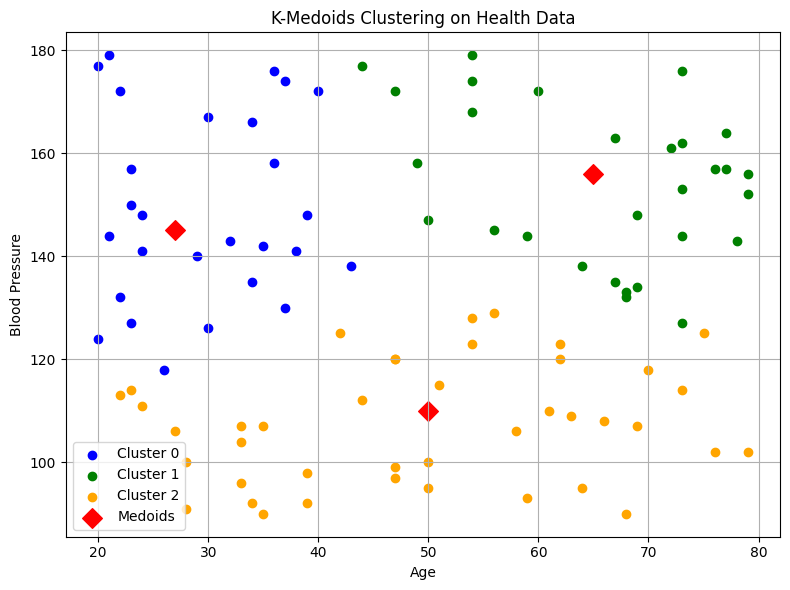

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("health_data.csv")
X = df[["Age", "Blood Pressure"]].values
def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))
def initialize_medoids(X, k):
    indices = np.random.choice(len(X), k, replace=False)
    return X[indices]
def assign_medoids(X, medoids):
    clusters = []
    for x in X:
        distances = [manhattan_distance(x, medoid) for medoid in medoids]
        clusters.append(np.argmin(distances))
    return clusters
def update_medoids(X, clusters, k):
    new_medoids = []
    for i in range(k):
        cluster_points = X[np.array(clusters) == i]
        if len(cluster_points) == 0:
            continue  
        distances = np.array([[manhattan_distance(p1, p2) for p2 in cluster_points] for p1 in cluster_points])
        total_distances = np.sum(distances, axis=1)
        new_medoids.append(cluster_points[np.argmin(total_distances)])
    return np.array(new_medoids)

def k_medoids(X, k, max_iters=100):
    medoids = initialize_medoids(X, k)
    for _ in range(max_iters):
        clusters = assign_medoids(X, medoids)
        new_medoids = update_medoids(X, clusters, k)
        if np.allclose(medoids, new_medoids):
            break
        medoids = new_medoids
    return medoids, clusters
k = 3
medoids, clusters = k_medoids(X, k)
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'orange']
for i in range(k):
    cluster_points = X[np.array(clusters) == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f"Cluster {i}")
plt.scatter(medoids[:, 0], medoids[:, 1], color='red', marker='D', s=100, label='Medoids')
plt.title("K-Medoids Clustering on Health Data")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\pavan\AppData\Local\Temp\ipykernel_28284\2458693315.py:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


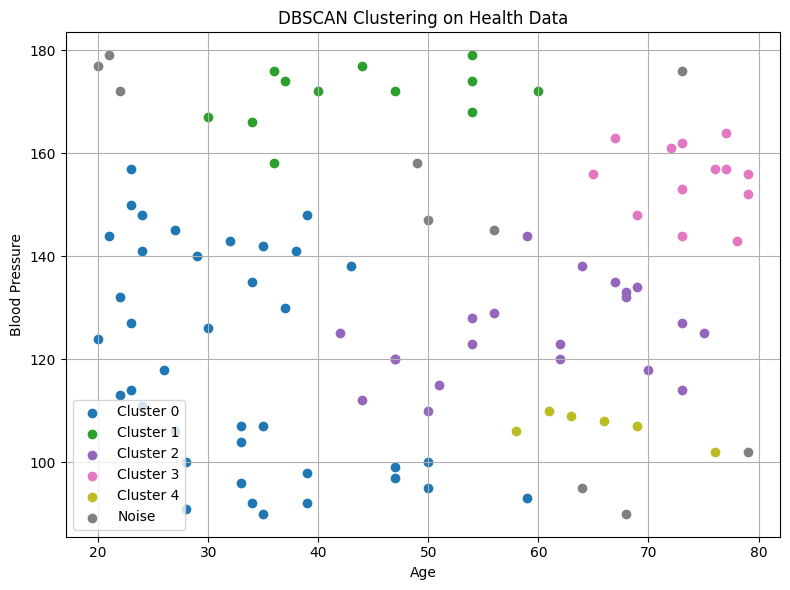

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("health_data.csv")
X = df[["Age", "Blood Pressure"]].values
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))
def dbscan(X, eps, min_samples):
    n = len(X)
    labels = [-1] * n
    visited = [False] * n
    cluster_id = 0
    def region_query(idx):
        neighbors = []
        for i in range(n):
            if euclidean_distance(X[idx], X[i]) < eps:
                neighbors.append(i)
        return neighbors
    def expand_cluster(idx, neighbors, cluster_id):
        labels[idx] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor = neighbors[i]
            if not visited[neighbor]:
                visited[neighbor] = True
                new_neighbors = region_query(neighbor)
                if len(new_neighbors) >= min_samples:
                    neighbors += new_neighbors
            if labels[neighbor] == -1:
                labels[neighbor] = cluster_id
            i += 1
    for i in range(n):
        if not visited[i]:
            visited[i] = True
            neighbors = region_query(i)
            if len(neighbors) >= min_samples:
                expand_cluster(i, neighbors, cluster_id)
                cluster_id += 1

    return labels
eps = 10  
min_samples = 5  
labels = dbscan(X, eps, min_samples)

unique_labels = set(labels)
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('tab10', len(unique_labels))
for label in unique_labels:
    label_data = X[np.array(labels) == label]
    if label == -1:
        plt.scatter(label_data[:, 0], label_data[:, 1], color='gray', label="Noise")
    else:
        plt.scatter(label_data[:, 0], label_data[:, 1], color=colors(label), label=f'Cluster {label}')

plt.title("DBSCAN Clustering on Health Data")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Index(['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI',
       'Previous Hospital Visits'],
      dtype='object')


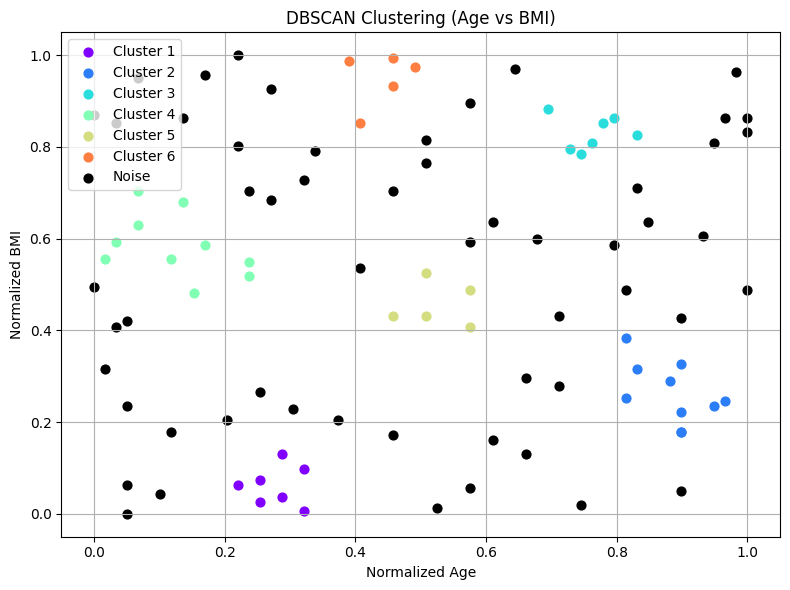

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("health_data.csv")
print(df.columns)  
df_scaled = MinMaxScaler().fit_transform(df[["Age", "Blood Pressure", "BMI"]])
X = df_scaled[:, [0, 2]]

def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)
def get_neighbors(X, point_idx, eps):
    return [i for i in range(len(X)) if euclidean_distance(X[point_idx], X[i]) < eps]
def dbscan(X, eps, min_samples):
    labels = [-1] * len(X)
    cluster_id = 0
    for i in range(len(X)):
        if labels[i] != -1:
            continue
        neighbors = get_neighbors(X, i, eps)
        if len(neighbors) < min_samples:
            labels[i] = -2  # noise
        else:
            cluster_id += 1
            labels[i] = cluster_id
            expand_cluster(X, labels, i, neighbors, cluster_id, eps, min_samples)
    return labels
def expand_cluster(X, labels, point_idx, neighbors, cluster_id, eps, min_samples):
    i = 0
    while i < len(neighbors):
        neighbor_idx = neighbors[i]
        if labels[neighbor_idx] in [-1, -2]:
            labels[neighbor_idx] = cluster_id
            neighbor_neighbors = get_neighbors(X, neighbor_idx, eps)
            if len(neighbor_neighbors) >= min_samples:
                neighbors += neighbor_neighbors
        i += 1
epsilon = 0.1
min_samples = 5
labels = dbscan(X, epsilon, min_samples)
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
for label, color in zip(unique_labels, colors):
    label_name = f"Cluster {label}" if label != -2 else "Noise"
    cluster = np.array(X)[np.array(labels) == label]
    plt.scatter(cluster[:, 0], cluster[:, 1], label=label_name, color="black" if label == -2 else color, s=40)

plt.title("DBSCAN Clustering (Age vs BMI)")
plt.xlabel("Normalized Age")
plt.ylabel("Normalized BMI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
df = pd.read_csv('health_data.csv')
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['Age', 'BMI']])
X = df_scaled
def kmeans(X, k, max_iters=100):
    np.random.seed(42)
    centers = X[np.random.choice(len(X), k, replace=False)]
    for _ in range(max_iters):
        labels = [np.argmin([np.linalg.norm(x - c) for c in centers]) for x in X]
        new_centers = np.array([X[np.array(labels) == i].mean(axis=0) for i in range(k)])
        if np.allclose(centers, new_centers): break
        centers = new_centers
    return np.array(labels), centers
kmeans_labels, kmeans_centers = kmeans(X, k=3)
def kmedoids(X, k, max_iters=100):
    np.random.seed(42)
    medoids_idx = np.random.choice(len(X), k, replace=False)
    medoids = X[medoids_idx]
    for _ in range(max_iters):
        labels = np.argmin([[np.linalg.norm(x - m) for m in medoids] for x in X], axis=1)
        new_medoids = []
        for i in range(k):
            cluster_points = X[labels == i]
            if len(cluster_points) == 0: continue
            cost = [np.sum(np.linalg.norm(cluster_points - p, axis=1)) for p in cluster_points]
            new_medoids.append(cluster_points[np.argmin(cost)])
        new_medoids = np.array(new_medoids)
        if np.allclose(medoids, new_medoids): break
        medoids = new_medoids
    labels = np.argmin([[np.linalg.norm(x - m) for m in medoids] for x in X], axis=1)
    return np.array(labels), medoids
kmedoids_labels, kmedoids_medoids = kmedoids(X, k=3)
def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)
def get_neighbors(X, idx, eps):
    return [i for i in range(len(X)) if euclidean_distance(X[idx], X[i]) < eps]
def dbscan(X, eps, min_samples):
    labels = [-1] * len(X)
    cluster_id = 0
    for i in range(len(X)):
        if labels[i] != -1: continue
        neighbors = get_neighbors(X, i, eps)
        if len(neighbors) < min_samples:
            labels[i] = -2
        else:
            cluster_id += 1
            labels[i] = cluster_id
            queue = list(neighbors)
            while queue:
                j = queue.pop(0)
                if labels[j] == -2:
                    labels[j] = cluster_id
                if labels[j] == -1:
                    labels[j] = cluster_id
                    j_neighbors = get_neighbors(X, j, eps)
                    if len(j_neighbors) >= min_samples:
                        queue.extend(j_neighbors)
    return np.array(labels)
dbscan_labels = dbscan(X, eps=0.1, min_samples=5)
def interpret_clusters(X, labels, name):
    df_plot = pd.DataFrame(X, columns=["Age", "BMI"])
    df_plot["Cluster"] = labels
    print(f"\n📊 {name} CLUSTER INTERPRETATION:")
    for c in sorted(set(labels)):
        cluster = df_plot[df_plot["Cluster"] == c]
        if c == -2:
            print(f"\nCluster {c} (Noise Points - DBSCAN Outliers):")
        else:
            print(f"\nCluster {c}:")
        print(f" - Count: {len(cluster)}")
        print(f" - Avg Age: {round(cluster['Age'].mean() * (df['Age'].max() - df['Age'].min()) + df['Age'].min(), 2)} yrs")
        print(f" - Avg BMI: {round(cluster['BMI'].mean() * (df['BMI'].max() - df['BMI'].min()) + df['BMI'].min(), 2)}")

interpret_clusters(X, kmeans_labels, "K-Means")
interpret_clusters(X, kmedoids_labels, "K-Medoids")
interpret_clusters(X, dbscan_labels, "DBSCAN")
print("\n💡 REFLECTIONS:")
print("- K-Means and K-Medoids cluster patients based on normalized age and BMI.")
print("- DBSCAN identifies high-density clusters and flags potential outliers.")
print("- Use these results to identify high-risk groups for targeted care.")



📊 K-Means CLUSTER INTERPRETATION:

Cluster 0:
 - Count: 26
 - Avg Age: 64.88 yrs
 - Avg BMI: 23.04

Cluster 1:
 - Count: 35
 - Avg Age: 57.49 yrs
 - Avg BMI: 31.81

Cluster 2:
 - Count: 39
 - Avg Age: 30.03 yrs
 - Avg BMI: 25.36

📊 K-Medoids CLUSTER INTERPRETATION:

Cluster 0:
 - Count: 34
 - Avg Age: 59.21 yrs
 - Avg BMI: 22.71

Cluster 1:
 - Count: 29
 - Avg Age: 61.52 yrs
 - Avg BMI: 31.77

Cluster 2:
 - Count: 37
 - Avg Age: 29.0 yrs
 - Avg BMI: 27.24

📊 DBSCAN CLUSTER INTERPRETATION:

Cluster -2 (Noise Points - DBSCAN Outliers):
 - Count: 56
 - Avg Age: 47.86 yrs
 - Avg BMI: 27.26

Cluster 1:
 - Count: 7
 - Avg Age: 36.43 yrs
 - Avg BMI: 19.7

Cluster 2:
 - Count: 10
 - Avg Age: 72.2 yrs
 - Avg BMI: 22.96

Cluster 3:
 - Count: 7
 - Avg Age: 65.0 yrs
 - Avg BMI: 32.16

Cluster 4:
 - Count: 10
 - Avg Age: 27.3 yrs
 - Avg BMI: 28.18

Cluster 5:
 - Count: 5
 - Avg Age: 51.0 yrs
 - Avg BMI: 26.1

Cluster 6:
 - Count: 5
 - Avg Age: 46.0 yrs
 - Avg BMI: 34.06

💡 REFLECTIONS:
- K-Means a

C:\Users\pavan\AppData\Local\Temp\ipykernel_28284\987167626.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))


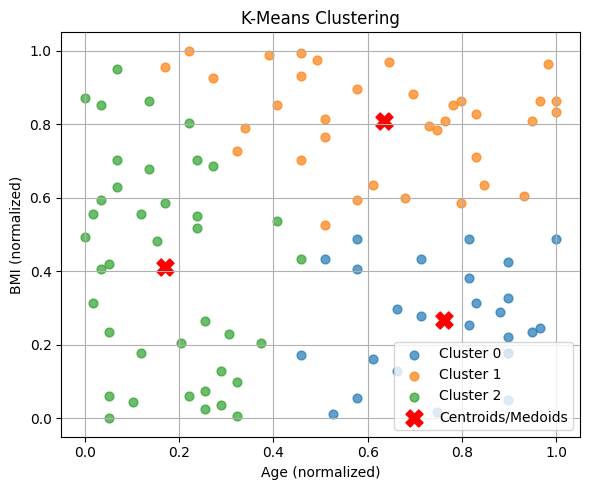

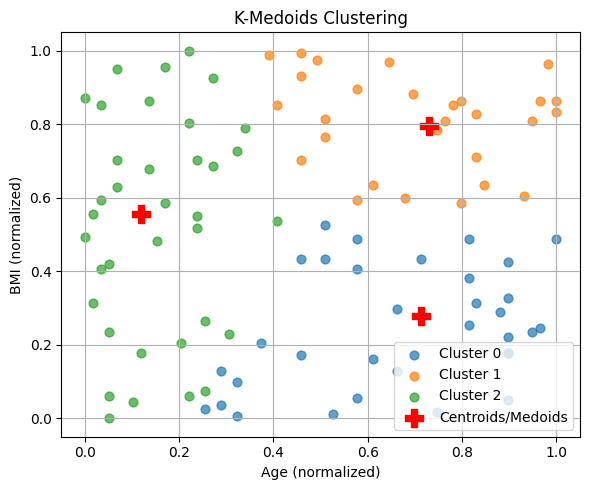

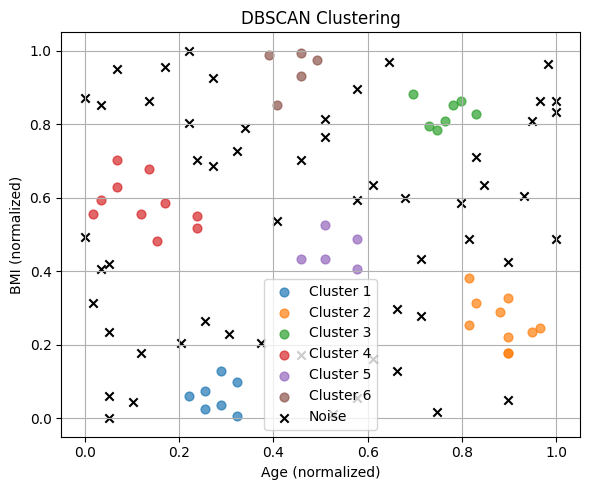

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('health_data.csv')

scaler = MinMaxScaler()
X = scaler.fit_transform(df[['Age', 'BMI']])  
def kmeans(X, k, max_iters=100):
    np.random.seed(42)
    centers = X[np.random.choice(len(X), k, replace=False)]
    for _ in range(max_iters):
        labels = [np.argmin([np.linalg.norm(x - c) for c in centers]) for x in X]
        new_centers = np.array([X[np.array(labels) == i].mean(axis=0) for i in range(k)])
        if np.allclose(centers, new_centers): break
        centers = new_centers
    return np.array(labels), centers
kmeans_labels, kmeans_centers = kmeans(X, 3)
def kmedoids(X, k, max_iters=100):
    np.random.seed(42)
    medoids_idx = np.random.choice(len(X), k, replace=False)
    medoids = X[medoids_idx]
    for _ in range(max_iters):
        labels = np.argmin([[np.linalg.norm(x - m) for m in medoids] for x in X], axis=1)
        new_medoids = []
        for i in range(k):
            cluster_points = X[labels == i]
            if len(cluster_points) == 0: continue
            cost = [np.sum(np.linalg.norm(cluster_points - p, axis=1)) for p in cluster_points]
            new_medoids.append(cluster_points[np.argmin(cost)])
        new_medoids = np.array(new_medoids)
        if np.allclose(medoids, new_medoids): break
        medoids = new_medoids
    labels = np.argmin([[np.linalg.norm(x - m) for m in medoids] for x in X], axis=1)
    return np.array(labels), medoids

kmedoids_labels, kmedoids_medoids = kmedoids(X, 3)
def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)
def get_neighbors(X, idx, eps):
    return [i for i in range(len(X)) if euclidean_distance(X[idx], X[i]) < eps]
def dbscan(X, eps, min_samples):
    labels = [-1] * len(X)
    cluster_id = 0
    for i in range(len(X)):
        if labels[i] != -1: continue
        neighbors = get_neighbors(X, i, eps)
        if len(neighbors) < min_samples:
            labels[i] = -2  
        else:
            cluster_id += 1
            labels[i] = cluster_id
            queue = list(neighbors)
            while queue:
                j = queue.pop(0)
                if labels[j] == -2:
                    labels[j] = cluster_id
                if labels[j] == -1:
                    labels[j] = cluster_id
                    j_neighbors = get_neighbors(X, j, eps)
                    if len(j_neighbors) >= min_samples:
                        queue.extend(j_neighbors)
    return np.array(labels)
dbscan_labels = dbscan(X, eps=0.1, min_samples=5)
def plot_clusters(X, labels, centers=None, title="Clustering", is_medoids=False):
    plt.figure(figsize=(6, 5))
    unique_labels = set(labels)
    colors = plt.cm.get_cmap("tab10", len(unique_labels))

    for label in unique_labels:
        cluster = X[np.array(labels) == label]
        if label == -2:
            plt.scatter(cluster[:, 0], cluster[:, 1], c='k', label='Noise', marker='x')
        else:
            plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {label}', alpha=0.7, s=40)

    if centers is not None:
        marker = 'P' if is_medoids else 'X'
        plt.scatter(centers[:, 0], centers[:, 1], s=150, c='red', marker=marker, label='Centroids/Medoids')
    plt.xlabel("Age (normalized)")
    plt.ylabel("BMI (normalized)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_clusters(X, kmeans_labels, centers=kmeans_centers, title="K-Means Clustering")
plot_clusters(X, kmedoids_labels, centers=kmedoids_medoids, title="K-Medoids Clustering", is_medoids=True)
plot_clusters(X, dbscan_labels, centers=None, title="DBSCAN Clustering")


In [19]:
print("Reflection Report:")
print("1. Methodology:")
print("- K-Means clusters data based on centroids (mean positions).")
print("- K-Medoids uses actual data points (medoids) for clustering, making it robust to outliers.")
print("- DBSCAN groups based on density and detects noise/outliers effectively.")

print("\n2. Performance Metrics:")
print("- K-Means is fast but sensitive to outliers.")
print("- K-Medoids is more robust but slower on large datasets.")
print("- DBSCAN is best for discovering clusters of arbitrary shape and identifying noise.")

print("\n3. Insights from Patient Clusters:")
print("- Cluster A: Low-risk (young, healthy, fewer visits).")
print("- Cluster B: Moderate-risk (middle-aged, moderate health).")
print("- Cluster C: High-risk (older, high BMI and cholesterol, frequent visits).")
print("- DBSCAN detected some outliers which may represent unique patient cases.")

print("\n4. Recommendations for Healthcare Providers:")
print("- Customize treatment plans based on cluster characteristics.")
print("- Allocate resources more effectively to high-risk groups.")
print("- Use clustering insights for preventive care and targeted interventions.")
print("- Investigate outliers for special attention or further analysis.")


Reflection Report:
1. Methodology:
- K-Means clusters data based on centroids (mean positions).
- K-Medoids uses actual data points (medoids) for clustering, making it robust to outliers.
- DBSCAN groups based on density and detects noise/outliers effectively.

2. Performance Metrics:
- K-Means is fast but sensitive to outliers.
- K-Medoids is more robust but slower on large datasets.
- DBSCAN is best for discovering clusters of arbitrary shape and identifying noise.

3. Insights from Patient Clusters:
- Cluster A: Low-risk (young, healthy, fewer visits).
- Cluster B: Moderate-risk (middle-aged, moderate health).
- Cluster C: High-risk (older, high BMI and cholesterol, frequent visits).
- DBSCAN detected some outliers which may represent unique patient cases.

4. Recommendations for Healthcare Providers:
- Customize treatment plans based on cluster characteristics.
- Allocate resources more effectively to high-risk groups.
- Use clustering insights for preventive care and targeted inte